**QUESTION 1**

IMPORTING LIBRARIES

In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd

NEWFOUNDLAND DOG SYNSET

In [ ]:
nfd_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02111277")
print(nfd_page.content)

nfd_soup = BeautifulSoup(nfd_page.content, 'html.parser')

DALMATIAN DOG SYNSET

In [ ]:
dalmation_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02110341")
print(dalmation_page.content)

dalmation_soup = BeautifulSoup(dalmation_page.content, 'html.parser')

HUSKY DOG SYNSET

In [ ]:
husky_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02109961")
print(husky_page.content)

husky_soup = BeautifulSoup(husky_page.content, 'html.parser')

SPLITTING THE URLs

In [ ]:
str_nfd_soup=str(nfd_soup)
type(str_nfd_soup)
nfd_split_urls=str_nfd_soup.split('\r\n')
print(len(nfd_split_urls))

str_dalmation_soup=str(dalmation_soup)
type(str_dalmation_soup)
dalmation_split_urls=str_dalmation_soup.split('\r\n')
print(len(dalmation_split_urls))

str_husky_soup=str(husky_soup)
type(str_husky_soup)
husky_split_urls=str_husky_soup.split('\r\n')
print(len(husky_split_urls))

MAKE FOLDERS


In [ ]:
!mkdir /content/train 
!mkdir /content/train/nfd
!mkdir /content/train/dalmation 
!mkdir /content/train/husky 
!mkdir /content/validation
!mkdir /content/validation/nfd
!mkdir /content/validation/dalmation
!mkdir /content/validation/husky
!mkdir /content/test/ 
!mkdir /content/test/test

In [ ]:
img_rows, img_cols = 32, 32 
input_shape = (img_rows, img_cols, 3)

def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	return image

# TRAIN SET

training_images=100 
for progress in range(training_images):
    if(progress%20==0):
        print(progress)
    if not nfd_split_urls[progress] == None:
      try:
        I = url_to_image(nfd_split_urls[progress])
        if (len(I.shape))==3:
          save_path = '/content/train/nfd/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None


for progress in range(training_images):
    if(progress%20==0):
        print(progress)
    if not dalmation_split_urls[progress] == None:
      try:
        I = url_to_image(dalmation_split_urls[progress])
        if (len(I.shape))==3:
          save_path = '/content/train/dalmation/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(training_images):
    if(progress%20==0):
        print(progress)
    if not husky_split_urls[progress] == None:
      try:
        I = url_to_image(husky_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/train/husky/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None        

# VALIDATION SET        

for progress in range(50):
    if(progress%10==0):
        print(progress)
    if not nfd_split_urls[progress] == None:
      try:
        I = url_to_image(nfd_split_urls[training_images+progress])
        if (len(I.shape))==3:
          save_path = '/content/validation/nfd/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):
    if(progress%10==0):
        print(progress)
    if not dalmation_split_urls[progress] == None:
      try:
        I = url_to_image(dalmation_split_urls[training_images+progress])
        if (len(I.shape))==3:
          save_path = '/content/validation/dalmation/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):
    if(progress%10==0):
        print(progress)
    if not husky_split_urls[progress] == None:
      try:
        I = url_to_image(husky_split_urls[training_images+progress])
        if (len(I.shape))==3: 
          save_path = '/content/validation/husky/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None  

In [ ]:
print("\nTRAIN:\n")          

print("\nlist the files inside nfd directory:\n")        
!ls /content/train/nfd
print("\nlist the files inside dalmation directory:\n")
!ls /content/train/dalmation
print("\nlist the files inside husky directory:\n")
!ls /content/train/husky

print("\nVALIDATION:\n")

print("\nlist the files inside nfd directory:\n")        
!ls /content/validation/nfd
print("\nlist the files inside dalmation directory:\n")
!ls /content/validation/dalmation  
print("\nlist the files inside husky directory:\n")        
!ls /content/validation/husky

In [ ]:
for progress in range(50):
    if(progress%10==0):
        print(progress)
    if not nfd_split_urls[progress] == None:
      try:
        I = url_to_image(nfd_split_urls[training_images+progress+100])
        if (len(I.shape))==3:
          save_path = '/content/test/test/nfd_'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None


for progress in range(50):
    if(progress%10==0):
        print(progress)
    if not dalmation_split_urls[progress] == None:
      try:
        I = url_to_image(dalmation_split_urls[training_images+progress+100])
        if (len(I.shape))==3:
          save_path = '/content/test/test/dalmation_'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None


for progress in range(50):
    if(progress%10==0):
        print(progress)
    if not husky_split_urls[progress] == None:
      try:
        I = url_to_image(husky_split_urls[training_images+progress+100])
        if (len(I.shape))==3:
          save_path = '/content/test/test/husky_'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None 

In [ ]:
original_test = '/content/test/test'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'nfd':
        categories.append('nfd')
    elif category == 'dalmation':
        categories.append('dalmation')
    else:
        categories.append('husky')

data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_test.csv",index=False)

**QUESTION 2 : BUILDING A CLASSIFICATION MODEL**

In [52]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [53]:
model = Sequential()
model.add(Input((150, 150, 3)))

model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(256, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(256, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(512, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())
model.add(Dense(4096, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(1024, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(3, activation='softmax'))

In [54]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 64)      256       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 75, 75, 128)      

**QUESTION 3**

Data Augmentation Techniques Used : Width Shift, Height Shift, Zoom Range, Horizontal Flipping, Rescaling

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
trainval_datagen = ImageDataGenerator(
    rescale=1./255, horizontal_flip = True, rotation_range = True, vertical_flip = True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [57]:
train_generator = trainval_datagen.flow_from_directory(directory='/content/train/',
                                                       shuffle=True,
                                                       color_mode='rgb',
                                                       class_mode='categorical',
                                                       target_size=(150,150))

val_generator = trainval_datagen.flow_from_directory(directory='/content/validation/',                                                      
                                                       shuffle=True,                                                       
                                                       color_mode='rgb',
                                                       class_mode='categorical',
                                                       target_size=(150,150))



test_generator = test_datagen.flow_from_directory(directory='/content/test/',
                                                  shuffle=False,                                                  
                                                  class_mode=None,
                                                  color_mode='rgb',
                                                  target_size=(150,150))

Found 219 images belonging to 3 classes.
Found 95 images belonging to 3 classes.
Found 102 images belonging to 1 classes.


CALLBACKS

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
es = EarlyStopping(monitor='val_accuracy', patience=10, mode='auto')

In [60]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [62]:
history = model.fit_generator(train_generator, validation_data=val_generator, steps_per_epoch=len(train_generator), epochs=50, callbacks=[es], verbose=2)

Epoch 1/50
7/7 - 5s - loss: 10.1271 - accuracy: 0.3790 - val_loss: 31.7718 - val_accuracy: 0.3263
Epoch 2/50
7/7 - 4s - loss: 2.9668 - accuracy: 0.4658 - val_loss: 1093.4275 - val_accuracy: 0.3263
Epoch 3/50
7/7 - 4s - loss: 2.2522 - accuracy: 0.5023 - val_loss: 462.4933 - val_accuracy: 0.3579
Epoch 4/50
7/7 - 4s - loss: 1.9894 - accuracy: 0.5114 - val_loss: 136.2547 - val_accuracy: 0.3263
Epoch 5/50
7/7 - 4s - loss: 1.4513 - accuracy: 0.5479 - val_loss: 50.4163 - val_accuracy: 0.3158
Epoch 6/50
7/7 - 4s - loss: 1.1608 - accuracy: 0.5753 - val_loss: 21.7302 - val_accuracy: 0.3368
Epoch 7/50
7/7 - 4s - loss: 1.1660 - accuracy: 0.5479 - val_loss: 6.0068 - val_accuracy: 0.3263
Epoch 8/50
7/7 - 4s - loss: 1.0049 - accuracy: 0.6484 - val_loss: 1.7026 - val_accuracy: 0.3474
Epoch 9/50
7/7 - 4s - loss: 0.8134 - accuracy: 0.6804 - val_loss: 1.9048 - val_accuracy: 0.3579
Epoch 10/50
7/7 - 4s - loss: 0.8177 - accuracy: 0.5799 - val_loss: 1.5446 - val_accuracy: 0.3263
Epoch 11/50
7/7 - 4s - loss:

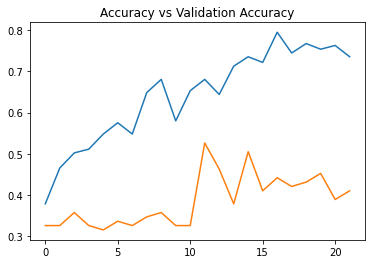

In [63]:
import matplotlib

matplotlib.pyplot.plot(history.history['accuracy'])
matplotlib.pyplot.plot(history.history['val_accuracy'])
matplotlib.pyplot.title('Accuracy vs Validation Accuracy')
matplotlib.pyplot.show()

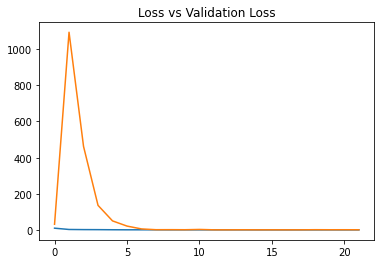

In [64]:

matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])
matplotlib.pyplot.title('Loss vs Validation Loss')
matplotlib.pyplot.show()